In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import torch
import os
import itertools
import rsatoolbox as rsa
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# rdm_path = '/home/snail-race/projects/crijnen_project/results/seed_42/allen/rdms'
rdm_path = '/home/snail-race/projects/crijnen_project/results/seed_42/monkey/rdms'
# suffix = '6_natural_scenes.pt'
# suffix = '6_natural_movie_one.pt'
suffix = '6_V12.pt'
# suffix = '6_V4.pt'
models = ['Rat', 'Treeshrew']
combinations = itertools.combinations(models, 2)
results = {}
for k1, k2 in combinations:
    rdm1 = torch.load(os.path.join(rdm_path, f'{k1.lower()}_{suffix}')) #
    rdm2 = torch.load(os.path.join(rdm_path, f'{k2.lower()}_{suffix}'))
    results[(k1, k2)] = {}
    for layer in rdm1.keys():
        res = rsa.rdm.compare(rdm1[layer], rdm2[layer], method="tau-a")
        results[(k1, k2)][layer] = np.array(res).reshape(-1)

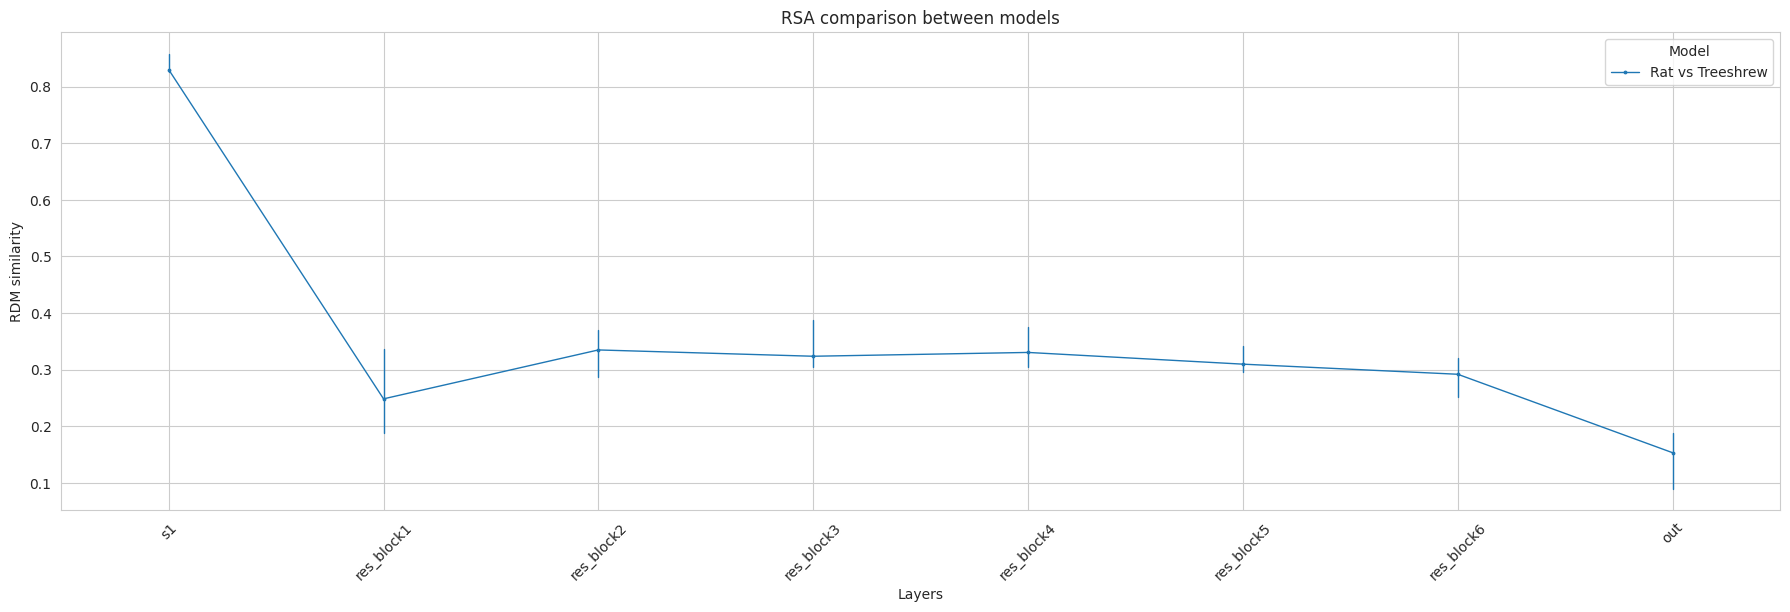

In [7]:
data = []
for model_pair, kt in results.items():
    df_model = pd.DataFrame(kt).melt(var_name='Layer', value_name='RSA')
    df_model['Model'] = ' vs '.join(model_pair)
    df_model['Path'] = [layer[:2] if layer[:2] in ['p1', 'p2'] else '' for layer in df_model['Layer']]
    df_model['Layer'] = [layer[3:] if layer[:2] in ['p1', 'p2'] else layer for layer in df_model['Layer']]
    df_model.reset_index(drop=True, inplace=True)
    data.append(df_model)
    
df = pd.concat(data)
df = df.loc[df.Path != 'p2']
df = df.loc[df['Layer'] != 'pixel']
df = df.drop_duplicates(keep='first')

plt.figure(figsize=(18, 6))
pointplot = sns.pointplot(data=df, x='Layer', y='RSA', hue='Model', estimator='median', err_kws={'linewidth': 1}, markersize=2, linewidth=1)
plt.xlabel('Layers')
plt.xticks(rotation=45)
plt.ylabel('RDM similarity')
# plt.legend(title='Model', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.title(f'RSA comparison between models')
plt.show()

In [5]:
df

,Layer,RSA,Model,Path
25,s1,0.816223,Rat vs Treeshrew,
26,s1,0.830029,Rat vs Treeshrew,
27,s1,0.833877,Rat vs Treeshrew,
28,s1,0.822944,Rat vs Treeshrew,
29,s1,0.780034,Rat vs Treeshrew,
...,...,...,...,...
370,out,0.187868,Rat vs Treeshrew,
371,out,0.208302,Rat vs Treeshrew,
372,out,0.154341,Rat vs Treeshrew,
373,out,0.100616,Rat vs Treeshrew,
